# Resposta da Corrente

0.02*s/(0.02*s*(0.055*s + 1.5) + 0.16184529)

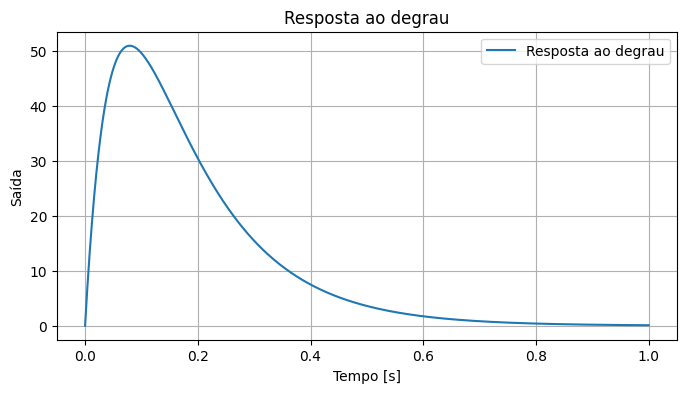

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

s,t = sp.symbols('s t')
time = np.linspace(0, 1, 1000)

Ra = 1.5#Ohm
La = 0.055 #H
Va = 100 #V
kt = 0.4023
ke = kt
Km = ke
K = kt

J = 0.02
B = 0.0

Ia_s = (J*s + B) / ((J*s + B)*(s*La + Ra) + K**2)
display(Ia_s)

print()

num = [J, B]
den = np.polymul([La, Ra], [J, B])  # (La*s+Ra)*(J*s+B)
den[-1] += K**2                     # soma K^2 ao termo constante
Giv = signal.TransferFunction(num, den)

# Exemplo de simulação ao degrau de Va
t = np.linspace(0, 1, 1000)
t_out, i_out = signal.step(Giv, T=t)      # degrau unitário de tensão
Va = 100.0
i_out = Va * i_out                        # escala para degrau de amplitude Va

# i_out é a corrente de armadura ao longo do tempo
# Plot
plt.figure(figsize=(8,4))
plt.plot(t_out, i_out, label="Resposta ao degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Saída")
plt.title("Resposta ao degrau")
plt.grid(True)
plt.legend()
plt.show()

# Controlador de Corrente

Dinâmica da Corrente na armadura do sistema em MALHA ABERTA:

$\frac{I_a}{I_{ref}} = G_I(s) = \frac{1}{L_a s + R_a} = \frac{\frac{1}{L_a}}{s + \frac{R_a}{L_A}}$


FT do controlador PI:

$G_{pi}(s) = K_p + \frac{K_i}{s}$


A FT do caminho direto do controlador com a dinâmica do motor ficará (em **malha aberta**):

$G_I(s) \cdot G_{pi}(s) = (\frac{\frac{1}{L_a}}{s + \frac{R_a}{L_A}}) (K_p + \frac{K_i}{s}) = \frac{\frac{K_p}{L_a}s + \frac{K_i}{L_a}}{s(s + \frac{R_a}{L_a})} = \frac{\frac{K_p}{L_a}(s + \frac{K_i}{K_p})}{s(s + \frac{R_a}{L_a})}$

te = 0.007333333333333333 s
Xi = 0.5911550337988974
wn = 135.3282902556064 rad/s
Kp = 1.3000000000000007
Ki = 1007.2560378928108
til = 0.0012906351027883764



(23.6363636363637*s + 18313.7461435057)/(s**2 + 160.0*s + 18313.7461435057)


Valor máximo do Overshoot: 11.017292804412813
Valor mínimo: 0.0


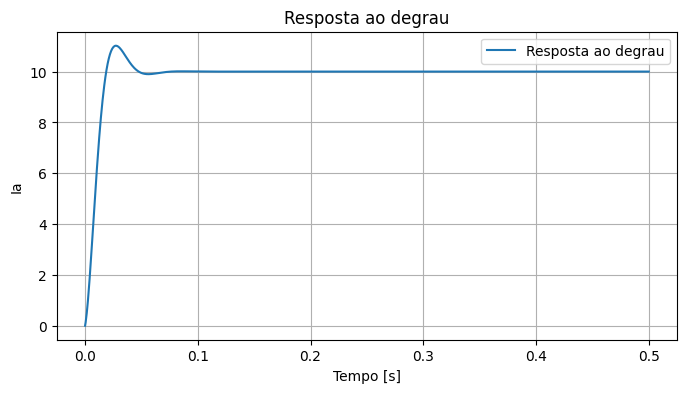

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

s,t = sp.symbols('s t')

Ra = 7.5#Ohm
La = 0.055 #H
Ia = 10 #V
kt = 0.4023
ke = kt
Km = ke
K = kt

J = 0.02
B = 0.0

Tss = 0.05

Mp = 10 / 100 #Mp (overshoot)

# Contstante de tempo
# da malha de corrente
te = La / Ra
print(f'te = {te} s')

# coeficiente de amortecimento
Xi = np.sqrt((np.log(Mp)**2) / (np.pi**2 + np.log(Mp)**2))
print(f'Xi = {Xi}')

# frequencia do sistema
wn = 4 / (Tss*Xi)
print(f"wn = {wn} rad/s")

Kp = 2 * Xi * wn * La - Ra
print(f'Kp = {Kp}')

Ki = wn**2 * La
print(f'Ki = {Ki}')

til = Kp / Ki
print(f'til = {til}')

print()

# Malha Fechada aqui
Gs = (Kp / La * (s + Ki / Kp)) / (s**2 + (Ra/La + Kp / La)*s + Ki / La)
display(Gs)

print()

num = [Kp / La, Ki / La]
den = [1, Ra / La + Kp / La, Ki / La]
Giv = signal.TransferFunction(num, den)

# Exemplo de simulação ao degrau de Va
t = np.linspace(0, 0.5, 1000)
t_out, i_out = signal.step(Giv, T=t)      # degrau unitário de tensão
i_out = Ia * i_out                        # escala para degrau de amplitude Va

print(f"Valor máximo do Overshoot: {np.max(i_out)}")
print(f"Valor mínimo: {np.min(i_out)}")

# i_out é a corrente de armadura ao longo do tempo
# Plot
plt.figure(figsize=(8,4))
plt.plot(t_out, i_out, label="Resposta ao degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Ia")
plt.title("Resposta ao degrau")
plt.grid(True)
plt.legend()
plt.show()

 # Resposta da Veloidade ao aplicado um valor de tensão $V_a$ em **Malha Aberta**

Baseado do Livro **Electric Motor Control
DC, AC, and BLDC Motors (Sang-ho Kim)**

Tm = 0.9268110304600152
Ta = 0.007333333333333333




365.727272727273/(s**2 + 136.363636363636*s + 147.132081818182)


s1 = -1.087643704742078
s2 = -135.2759926588943

wn = 12.129801392363431 rad/s
Xi = 5.621016863865839
Mp (overshoot) = (-0.9987034789996106-0.05090541262060632j)

wm max = 66.02587652512842


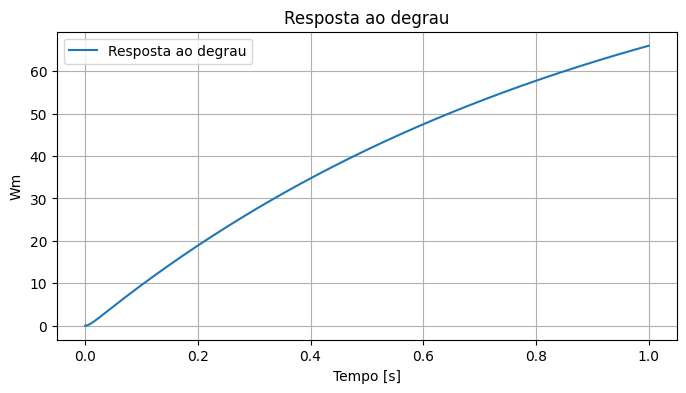

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

s,t = sp.symbols('s t')
t = np.linspace(0, 1, 500)  # tempo de 0 a 10s

Ra = 7.5#Ohm
La = 0.055 #H
Va = 100 #V
kt = 0.4023
ke = kt
Km = ke
K = kt

J = 0.02
B = 0.0

Ta = La / Ra
Tm = (J*Ra) / K**2
print(f'Tm = {Tm}\nTa = {Ta}\n')
print()


Gs = (1/K * (1 / (Tm*Ta))) / (s**2 + 1/Ta*s + (1 / (Tm*Ta)))
display(Gs)
print()

s1 = - 1 / (2*Ta) + np.emath.sqrt(1 / 4 - Ta / Tm) * 1 / Ta
s2 = - 1 / (2*Ta) - np.emath.sqrt(1 / 4 - Ta / Tm) * 1 / Ta
print(f's1 = {s1}')
print(f's2 = {s2}\n')

wn = 1 / np.sqrt(Ta*Tm)
print(f'wn = {wn} rad/s')

Xi = 1 / 2 * np.sqrt(Tm / Ta)
print(f'Xi = {Xi}')

Mp = np.exp(-np.pi * Xi / (np.emath.sqrt(1-Xi**2)))
print(f'Mp (overshoot) = {Mp}\n')

# Função de transferência G(s) = K / (tau*s + 1)
num = [(1/K * (1 / (Tm*Ta)))]           # numerador
den = [1, 1/Ta, 1/(Tm*Ta)]      # denominador
system = signal.TransferFunction(num, den)

# Simulação resposta ao degrau
t_out, y_out = signal.step(system, T=t)

# Como o ganho é 1 / K, deve-se multiplicar a entrada por K
# para ter o ganho unitario de 1
y_out *= Va * K

print(f"wm max = {np.max(y_out)}")

# Plot
plt.figure(figsize=(8,4))
plt.plot(t_out, y_out, label="Resposta ao degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Wm")
plt.title("Resposta ao degrau")
plt.grid(True)
plt.legend()
plt.show()

# Função de Transferência relacionado a velocidade e tensão de entrada para motroes com excitação independente em **Malha Aberta**

Baseado no Livro **Máquinas Eletricas (Fitzgeral, Kingsley, Kusko)**

$\frac{\Omega_m}{V_f / K_m} = \frac{1}{\tau_m(\tau_a s + 1)(s + \frac{B}{J})+1}$

* $K_m = \frac{e_{a0}}{\omega_{m0}} [\frac{N m}{A}]$
    *  $e_{a0}$ fem gerada correspondente à corrente de campo $I_f$ à velocidade $\omega_{m0}$.

* $\tau_a = \frac{L_a}{R_a}$: Constante de tempo elétrica do circuito de armadura.

* $\tau_m = \frac{J R_a}{K_m^2}$: Constante de tempo inercial

tau_m = 0.009268110304600152
tau_a = 0.007333333333333333



1/(s*(6.79661422337344e-5*s + 0.00926811030460015) + 1)


wm = 121.29801392363431 rad/s
Xi = 0.5621016863865839
Mp (overshoot) = 0.11822971291563285

wm max = 111.77583527443278


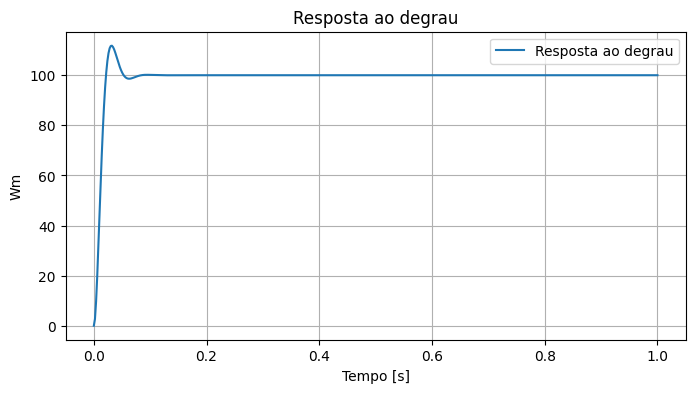

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

s,t = sp.symbols('s t')

Ra = 0.75#Ohm
La = 0.0055 #H
Va = 100 #V
kt = 0.4023
ke = kt
Km = ke
K = kt

J = 0.002
B = 0.0

tau_a = La / Ra
tau_m = (J*Ra) / Km**2

print(f'tau_m = {tau_m}')
print(f'tau_a = {tau_a}\n')

G_s = 1 / (tau_m * (tau_a*s + 1) * (s + B/J) + 1)
display(G_s)

print()

wm = np.sqrt(1/(tau_a*tau_m))
print(f'wm = {wm} rad/s')

Xi = 1/2 * np.sqrt(tau_m / tau_a)
print(f'Xi = {Xi}')

Mp = np.exp(-np.pi * Xi / (np.emath.sqrt(1-Xi**2)))
print(f'Mp (overshoot) = {Mp}\n')

# Função de transferência G(s) = K / (tau*s + 1)
num = [1]           # numerador
den = [tau_m*tau_a, tau_m*tau_a*B/J + tau_m, tau_m*B/J + 1]      # denominador
system = signal.TransferFunction(num, den)

# Simulação resposta ao degrau
t = np.linspace(0, 1, 500)  # tempo de 0 a 10s
t_out, y_out = signal.step(system, T=t)

y_out *= Va

print(f"wm max = {np.max(y_out)}")

# Plot
plt.figure(figsize=(8,4))
plt.plot(t_out, y_out, label="Resposta ao degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Wm")
plt.title("Resposta ao degrau")
plt.grid(True)
plt.legend()
plt.show()

# Controlador de Velocidade

## Malha Aberta

FT do controlador PI:

$G_{pi}(s) = K_p + \frac{K_i}{s}$

FT do controle de velocidade com o controlador de corrente:

$G_{pi\omega}(s) = (K_{pω} + \frac{K_{i\omega}}{s}) G_{i}(s) K_T (T_e - T_L) (\frac{1}{Js + B})$

Reorganizando a FT separando os controladores:

$G_{pi\omega}(s) = (K_{pω} + \frac{K_{i\omega}}{s}) (\frac{1}{Js + B}) G_{i}(s) K_T (T_e - T_L)$

O controle da malha externa será:

$G_{pi\omega}(s) = (K_{pω} + \frac{K_{i\omega}}{s})(\frac{1}{Js + B})$

$G_{pi\omega}(s) = \frac{\frac{K_{p\omega}}{J} + \frac{K_{\omega}}{J}}{s^2 + \frac{K_{p\omega}}{J}s + \frac{K_{i\omega}}{J}}$

te = 0.7333333333333334 s
Xi = 0.5911550337988974
wn = 9.22692888106407 rad/s
Kp = 0.21818181818181814
Ki = 1.7027243315242853
til = 0.12813690046145107



96.0453074853052/(s**2 + 10.9090909090909*s + 85.1362165762143)


Valor máximo do Overshoot: 337.32212241525866
Valor mínimo: 0.0


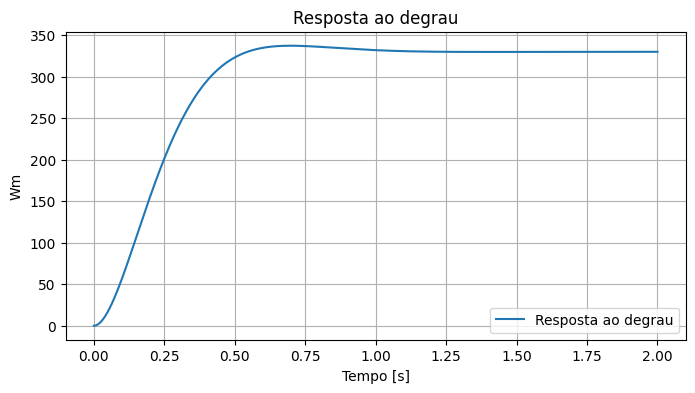

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import signal

s,t = sp.symbols('s t')

Ra = 0.75#Ohm
La = 0.055 #H
Ia = 10 #V
kt = 0.4023
ke = kt
Km = ke
K = kt

J = 0.02
B = 0.0

Wm = 330

Mp = 10 / 100 #Mp (overshoot)

# Contstante de tempo
# da malha de Velocidade
# Deve ser maior que a constante de tempo
# da malha de corrente
te = La / Ra * 10
print(f'te = {te} s')

# coeficiente de amortecimento
Xi = np.sqrt((np.log(Mp)**2) / (np.pi**2 + np.log(Mp)**2))
print(f'Xi = {Xi}')

# frequencia do sistema
wn = 4 / (te*Xi)
print(f"wn = {wn} rad/s")

Kp = 2 * Xi * wn * J
print(f'Kp = {Kp}')

Ki = wn**2 * J
print(f'Ki = {Ki}')

til = Kp / Ki
print(f'til = {til}')

print()

Gs = (Kp / J + Ki / J) / (s**2 + (Kp / J)*s + Ki / J)
display(Gs)

print()

num = [(Kp / J + Ki / J)]
den = [1, (Kp / J), Ki / Ki / J]
Gwv = signal.TransferFunction(num, den)

# Exemplo de simulação ao degrau de Va
t = np.linspace(0, 2, 1000)
t_out, wm_out = signal.step(Gwv, T=t)      # degrau unitário de tensão
wm_out =  Wm / (Kp+Ki) * wm_out                        # escala para degrau de amplitude Va

print(f"Valor máximo do Overshoot: {np.max(wm_out)}")
print(f"Valor mínimo: {np.min(wm_out)}")

# i_out é a corrente de armadura ao longo do tempo
# Plot
plt.figure(figsize=(8,4))
plt.plot(t_out, wm_out, label="Resposta ao degrau")
plt.xlabel("Tempo [s]")
plt.ylabel("Wm")
plt.title("Resposta ao degrau")
plt.grid(True)
plt.legend()
plt.show()